In [1]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.transforms import ToTensor, Resize
from PIL import Image
import os

In [2]:
class CustomImageDataset(Dataset):
    def __init__(self, input_dir, label_dir, transform=None):
        self.input_dir = input_dir
        self.label_dir = label_dir
        self.transform = transform
        self.image_files = os.listdir(input_dir)
        
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, idx):
    
        input_img = Image.open(os.path.join(self.input_dir, self.image_files[idx]))
        label_img = Image.open(os.path.join(self.label_dir, self.image_files[idx]))
        input_img = Resize((512, 512))(input_img)
        label_img = Resize((512, 512))(label_img)
        if self.transform:
            input_img = self.transform(input_img)
            label_img = self.transform(label_img)
        
        return input_img, label_img


In [3]:
input_dir = "E:\ProjectPics\DL_Images"
label_dir = "E:\ProjectPics\DL_AnnotatedImages"
custom_dataset = CustomImageDataset(input_dir, label_dir, transform=ToTensor())

In [4]:
data_size = len(custom_dataset)
train_size = int(0.8 * data_size)
validation_size = int(0.1 * data_size)
test_size = data_size - train_size - validation_size

In [5]:
train_dataset, validation_dataset, test_dataset = random_split(custom_dataset, [train_size, validation_size, test_size])
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=True)

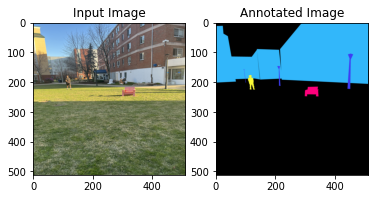

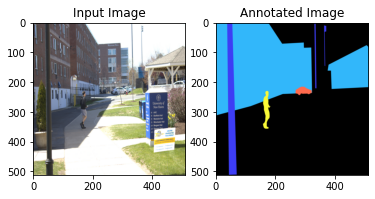

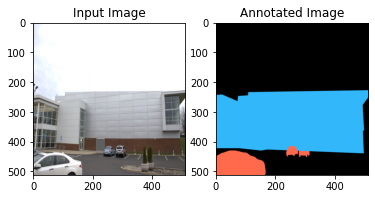

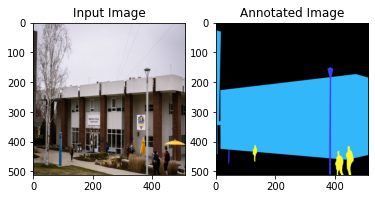

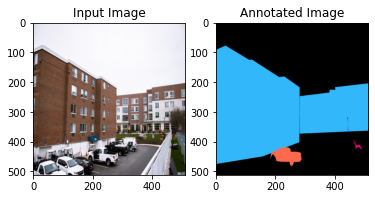

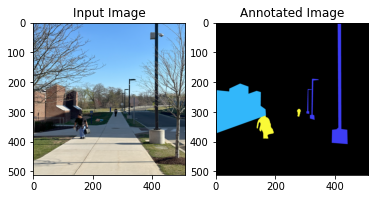

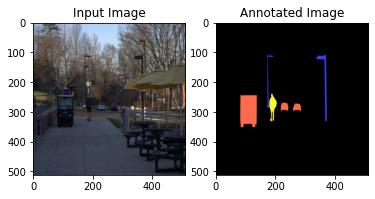

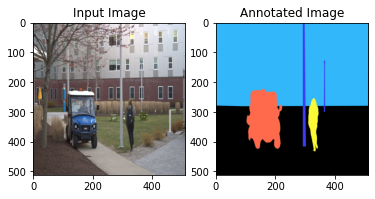

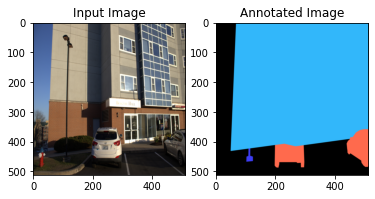

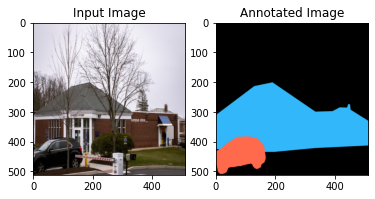

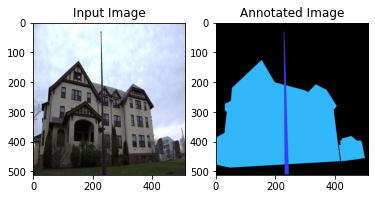

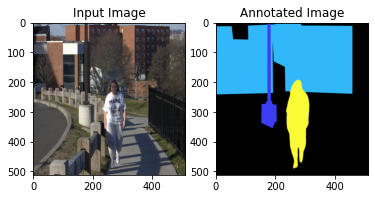

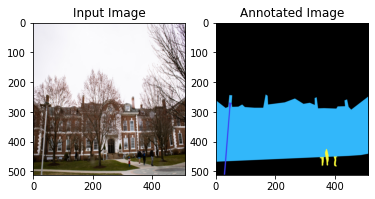

In [7]:
for i, (inputs, labels) in enumerate(train_dataloader):
    InputImage_sample = inputs[0]
    AnnotatedImage_sample = labels[0]
    
    InputImage_np = InputImage_sample.permute(1, 2, 0).numpy()
    AnnotatedImage_np = AnnotatedImage_sample.permute(1, 2, 0).numpy()
    
    import matplotlib.pyplot as plt
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(InputImage_np)
    axs[0].set_title("Input Image")
    axs[1].imshow(AnnotatedImage_np)
    axs[1].set_title("Annotated Image")
    plt.show()
    if i == len(train_dataloader)-1:
        break